In [18]:
import pandas as pd
import numpy as np
import arch

In [19]:
data = pd.read_csv(r'C:\Users\begba\Desktop\GOOG.csv')

In [20]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

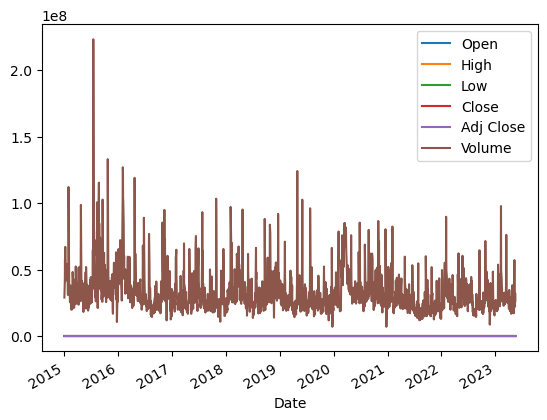

In [21]:
data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].plot()

In [22]:
# Choose the lag order for VARMA model
lag_order = 2

In [23]:
train_data = data['2015-01-02':'2023-05-17']
test_data = data['2015-01-02':]

In [8]:
# Estimate the VARMA-GARCH model
model = arch.arch_model(train_data['Close'], vol='Garch', p=lag_order, q=lag_order)
results = model.fit()


Iteration:      1,   Func. Count:      8,   Neg. LLF: 2017956429.264629
Iteration:      2,   Func. Count:     17,   Neg. LLF: 7397.76570285592
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1976249734537.6406
Iteration:      4,   Func. Count:     36,   Neg. LLF: 13022.778690369938
Iteration:      5,   Func. Count:     44,   Neg. LLF: 4702.001342411172
Iteration:      6,   Func. Count:     52,   Neg. LLF: 4464.232172570884
Iteration:      7,   Func. Count:     60,   Neg. LLF: 4428.444672323658
Iteration:      8,   Func. Count:     68,   Neg. LLF: 4478.496108780435
Iteration:      9,   Func. Count:     76,   Neg. LLF: 4416.581272521911
Iteration:     10,   Func. Count:     84,   Neg. LLF: 4377.847319380258
Iteration:     11,   Func. Count:     91,   Neg. LLF: 4550.783891762067
Iteration:     12,   Func. Count:     99,   Neg. LLF: 4674.653695358937
Iteration:     13,   Func. Count:    107,   Neg. LLF: 4654.5696262263855
Iteration:     14,   Func. Count:    115,   Neg. LLF: 4492.419

In [24]:
# Step 5: Model Diagnostics
# Perform diagnostic tests
print(results.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4371.35
Distribution:                  Normal   AIC:                           8754.71
Method:            Maximum Likelihood   BIC:                           8785.53
                                        No. Observations:                 1258
Date:                Tue, May 30 2023   Df Residuals:                     1257
Time:                        20:48:57   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            52.3719      1.494     35.052 3.576e-269 [ 49.443, 55.30

In [25]:
# Step 6: Volatility Forecasting
# Generate volatility forecasts
forecast_volatility = results.forecast(start=test_data.index[0], method='simulation')

D:\conda\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [26]:
# Estimate risk measures
forecast_var_covar = forecast_volatility.variance.iloc[-1]
alpha = 0.05
forecast_var_quantile = np.percentile(forecast_var_covar, alpha * 100)

if np.any(forecast_var_covar <= forecast_var_quantile):
    forecast_cvar = forecast_var_covar[forecast_var_covar <= forecast_var_quantile].mean()
else:
    forecast_cvar = np.nan

print(f"Forecasted VaR at {alpha * 100}%: {forecast_var_quantile}")
print(f"Forecasted CVaR at {alpha * 100}%: {forecast_cvar}")


Forecasted VaR at 5.0%: 206.31355860641673
Forecasted CVaR at 5.0%: 206.31355860641673


In [27]:
# Step 8: Performance Evaluation
# Compare forecasted volatility with actual values
actual_volatility = test_data['Close'].pct_change().dropna().values**2


In [29]:
# Calculate accuracy measures (e.g., RMSE)
actual_volatility_mean = np.nan_to_num(np.mean(actual_volatility))  # Replace NaN with zeros and calculate the mean of actual volatilities

rmse = np.sqrt(np.mean((forecast_conditional_volatility - actual_volatility_mean) ** 2))
print(f"RMSE: {rmse}")



RMSE: h.1   NaN
dtype: float64
